In [65]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable, Tuple
import math

In [66]:
def linear_eq_system(a, x):
    return np.dot(a, x)

In [67]:
def linear_midpoint_method(a, x, dt):
    k = dt * linear_eq_system(a, x)
    dx_dot = x + dt * linear_eq_system(a, x + 0.5 * k)
    return dx_dot

In [68]:
def initial_conditions_f(rx, ry, n):
    return [(x, y) for x in np.linspace(-rx, rx, n) for y in np.linspace(-ry, ry, n)]

In [69]:
def make_phase_plot(initial_conditions, a, sym, al, ah):
    for condition in initial_conditions:
        dt = 0.1
        t = 0
        x_axis = [float(condition[0])]
        y_axis = [float(condition[1])]
        times = [t]
        
        while t < 10:
            xnp1, ynp1 = linear_midpoint_method(a, np.array([x_axis[-1], y_axis[-1]]), dt)
            x_axis.append(xnp1)
            y_axis.append(ynp1)
            t += dt
            times.append(t)
        # Plot the data points with gradient colors
        plt.plot(x_axis, y_axis, color='blue', linewidth=0.2)
        
        # Add arrows to indicate direction
        for j in range(0, len(x_axis) - 1, 100000):
            plt.arrow(x_axis[j], y_axis[j], x_axis[j+1] - x_axis[j], y_axis[j+1] - y_axis[j], 
                    fc='blue', ec='blue', head_width=al, head_length=al) 

    plt.title(f"System {sym}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(initial_conditions[0][0], initial_conditions[-1][0])
    plt.ylim(initial_conditions[0][1], initial_conditions[-1][1])
    plt.grid(True)
    plt.show()

In [70]:
def draw_state_graph(a_matrices):
    # Draw parabola
    T_axis = np.arange(-10, 10.1, 0.1)
    D_curve = T_axis ** 2 / 4.0
    plt.plot(T_axis, D_curve, 'r', label='D = T^2 / 4')
    plt.xlabel('Trace')
    plt.ylabel('Determinant')
    plt.title('State Graph')
    plt.grid(True)
    
    # Draw each system position
    for syssym, A in zip(['a', 'b', 'c', 'd'], a_matrices):
        trace = np.trace(A)
        det = np.linalg.det(A)
        plt.scatter(trace, det, label=f'System {syssym}')   

    plt.legend()
    plt.show() 

In [71]:
matrix1 = np.array([[-2.0, 1.0], [0.0, 2.0]])
matrix2 = np.array([[3.0, -4.0], [2.0, -1.0]])
matrix3 = np.array([[-3.0, -2.0], [-1.0, -3.0]])
matrix4 = np.array([[2.0, 0.0], [0.0, 2.0]])
matricies = [matrix1, matrix2, matrix3, matrix4]

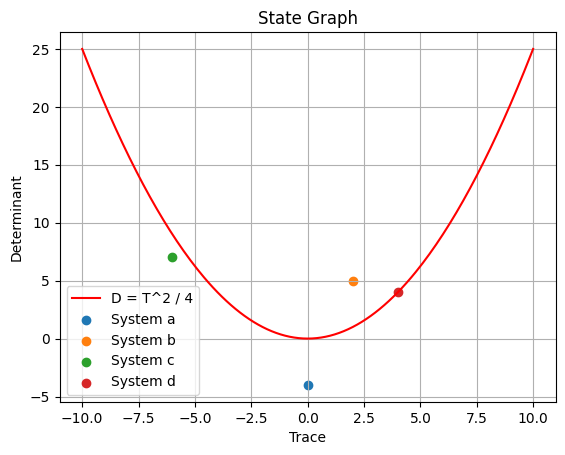

In [72]:
draw_state_graph(matricies)

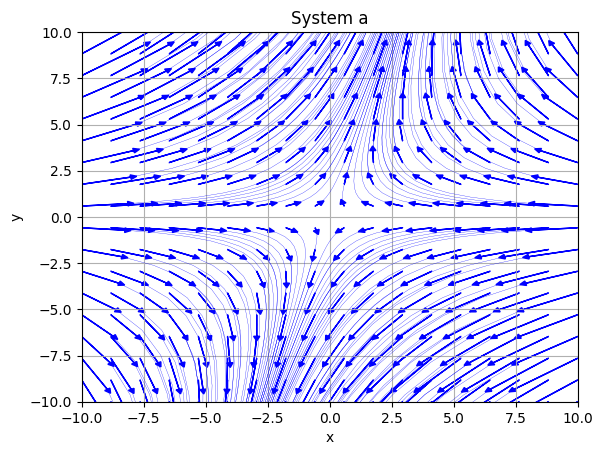

In [73]:
ic = initial_conditions_f(10, 10, 18)
make_phase_plot(ic, matricies[0], 'a', 0.25, 0.5)

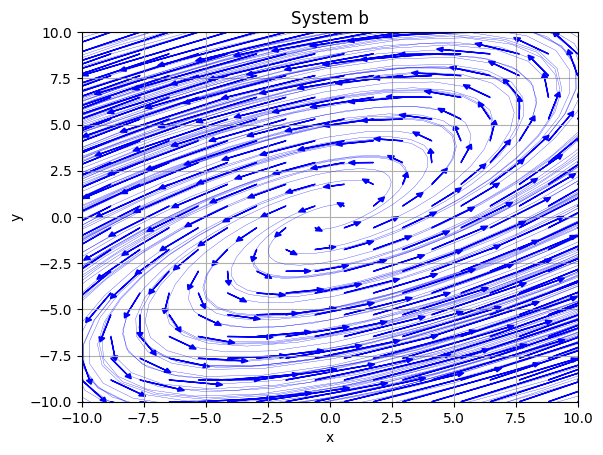

In [74]:
ic = initial_conditions_f(10, 10, 18)
make_phase_plot(ic, matricies[1], 'b', 0.25, 0.5)

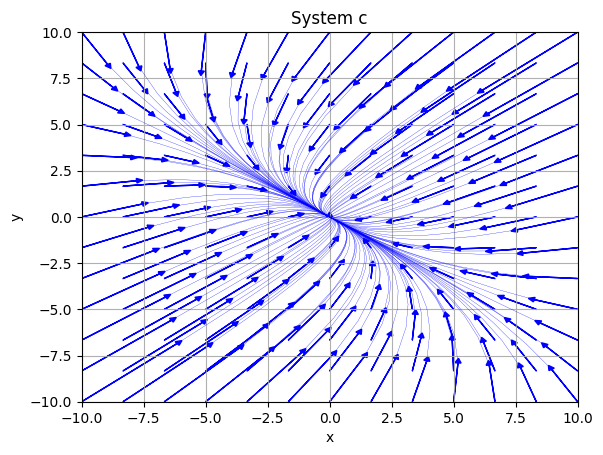

In [75]:
ic = initial_conditions_f(10, 10, 13)
make_phase_plot(ic, matricies[2], 'c', 0.25, 0.5)

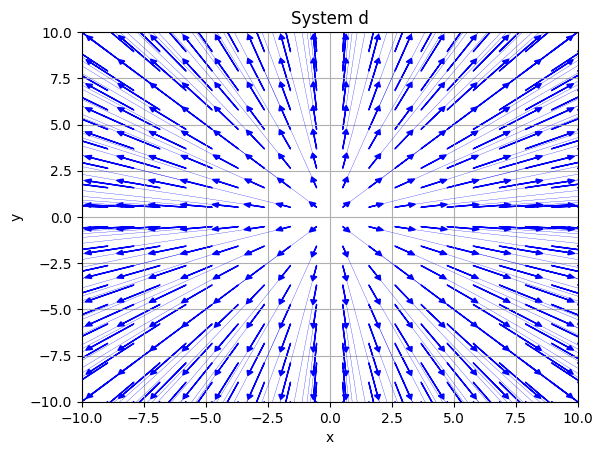

In [76]:
ic = initial_conditions_f(10, 10, 20)
make_phase_plot(ic, matricies[3], 'd', 0.25, 0.5)